In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)
test_loader = DataLoader(test_dataset, batch_size=8)

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Pneumonia vs Normal
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss:.4f}, Accuracy: {acc:.4f}")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct / total:.4f}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 184MB/s]


Epoch 1/5 - Loss: 68.7067, Accuracy: 0.9592
Epoch 2/5 - Loss: 25.9686, Accuracy: 0.9872
Epoch 3/5 - Loss: 11.7471, Accuracy: 0.9946
Epoch 4/5 - Loss: 14.8508, Accuracy: 0.9919
Epoch 5/5 - Loss: 10.7578, Accuracy: 0.9939
Test Accuracy: 0.7179


In [ ]:
from google.colab import files
uploaded = files.upload()

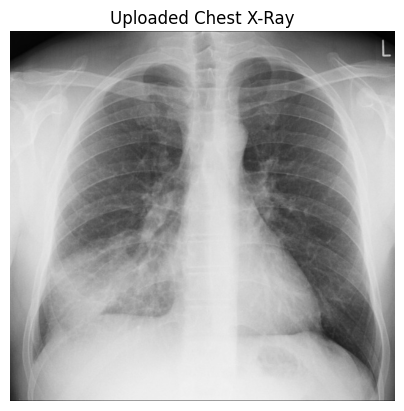

Prediction: {'PNEUMONIA - Bacterial (or Virus?)'}
Prediction: 95.08%confidence)


In [23]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F

image_transform = transforms.Compose([
    transforms.Resize((224,244)),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])
image_path = "test2.jpeg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Uploaded Chest X-Ray")
plt.show()


image_tensor = transform(image).unsqueeze(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_tensor = image_tensor.to(device)
model = model.to(device)

model.eval()
with torch.no_grad():
    outputs = model(image_tensor)
    probs = F.softmax(outputs, dim=1)
    confidence, predicted = torch.max(probs, 1)

class_names = ["NORMAL", "PNEUMONIA - Bacterial (or Virus?)"]
print("Prediction:", {class_names[predicted.item()]})
print(f"Prediction: {confidence.item()*100:.2f}%confidence)")

Notes: Likely predicts Pneumonia instead of Normal